In [1]:
import pandas as pd
import numpy as np

In [39]:
df = pd.DataFrame(
    {'A':[14.00,90.20,90.95,96.27,91.21],
     'B':[103.02,107.26,110.35,114.23,114.68], 
     'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [8]:
# 평균, 최대, 최소값을 이용해서 scaling
df["A"] - df["A"].mean()
# 각각의 값에서 평균을 뺀 값 반환

0   -62.526
1    13.674
2    14.424
3    19.744
4    14.684
Name: A, dtype: float64

In [12]:
# (x - min(x)) / (max(x) - min(x)) - scaling 공식
df["A"].max() - df["A"].min()

82.27

In [13]:
(df["A"] - df["A"].mean()) / (df["A"].max() - df["A"].min()) # 공식 대입
# -1 ~ 1 사이의 범위를 벗어날 수 없음

0   -0.760010
1    0.166209
2    0.175325
3    0.239990
4    0.178485
Name: A, dtype: float64

In [17]:
# 공식 함수로 만들기
def scale1(x):
    return (x - x.mean()) / (x.max() - x.min())

In [21]:
scale1(df["A"])

0   -0.760010
1    0.166209
2    0.175325
3    0.239990
4    0.178485
Name: A, dtype: float64

In [23]:
scale1(df["B"])

0   -0.590738
1   -0.227101
2    0.037907
3    0.370669
4    0.409262
Name: B, dtype: float64

In [24]:
# C열은 one hot으로 처리해 주어야 함
# 범주형은 one hot incoding

pd.get_dummies(df['C'])

,big,small
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [34]:
# 위 데이터를 완전히 가공하려면...
# A, B는 scaling, C는 one hot로 df함수 치환

df["A"] = scale1(df["A"])
df["B"] = scale1(df["B"])
df

,A,B,C,big,small
0,-0.760010,-0.590738,big,1,0
1,0.166209,-0.227101,small,0,1
2,0.175325,0.037907,big,1,0
3,0.239990,0.370669,small,0,1
4,0.178485,0.409262,small,0,1


In [53]:
temp = pd.get_dummies(df['C'])
df = pd.concat([df, temp], axis=1)
df = df.drop(["C"], axis=1)
# df = df.iloc[:,-2] C열 제거 (-2 :  -2만 제거하는 것을 의미)
df

,A,B,big,big,small,big,small
0,-1.784641,-1.405250,1,1,0,1,0
1,0.390289,-0.540230,0,0,1,0,1
2,0.411695,0.090174,1,1,0,1,0
3,0.563541,0.881749,0,0,1,0,1
4,0.419116,0.973556,0,0,1,0,1


In [98]:
df = pd.DataFrame(
    {'A':[14.00,90.20,90.95,96.27,91.21],
     'B':[103.02,107.26,110.35,114.23,114.68], 
     'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [55]:
# z-score
#(x - x.mean()) / (x.std()) # std : 표준편차

def scale2(x):
    return (x - x.mean()) / (x.std())

In [56]:
df["A"] = scale2(df["A"])
df["B"] = scale2(df["B"])
df

,A,B,C
0,-1.784641,-1.405250,big
1,0.390289,-0.540230,small
2,0.411695,0.090174,big
3,0.563541,0.881749,small
4,0.419116,0.973556,small


In [57]:
temp = pd.get_dummies(df["C"])
df = df.iloc[:,:-1] # 맨 끝 C만 제거하고 열을 가져옴 (인덱스를 뒤에서부터 세면 -1이 0인셈)
df = pd.concat([df,temp],axis=1)
df

,A,B,big,small
0,-1.784641,-1.405250,1,0
1,0.390289,-0.540230,0,1
2,0.411695,0.090174,1,0
3,0.563541,0.881749,0,1
4,0.419116,0.973556,0,1


In [58]:
# 주로 테이터 분석 - train / test
# train을 가지고 데이터 모델 가공 및 처리
# tag는 제출할 형태

In [60]:
# https://www.kaggle.com/c/titanic

In [143]:
train = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
# test(예측)
test = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data/test.csv")
test.head()

# Survived, Sex, Sibsp, - 범주형 데이터 *Age - 연속형의 형태를 띄고 있지만 구간별로 나뉠 수 있기 때문에 범주형의 속성을 지님
# 크고 작음을 구분할 수 있으면 연속형 데이터

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [145]:
test.head().T # 피벗 형태로 보여줌

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [78]:
# 결측치 확인하기
train.isna() # True : null값
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
train["PassengerId"].isna().sum() # 위 값이 사실인지 확인 (위 표대로 0이 반환되어야 함)

0

In [81]:
# 결측치의 비율
round(train.isna().sum() / len(train) * 100, 2) # round : 둘째자리까지 반올림

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [83]:
# age가 null이 아닌 데이터 추출
train[train["Age"].notnull()] 
# age열이 null값이 아닌 데이터만 추출
# na 보다 null 이 조금 더 정확

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [84]:
# 제거함으로써 데이터의 크기가 확 줄거나, 다른 의미있는 컬럼의 정보가 없어질 땐 제거하면 안됨
# gender 컬럼 속성이 중요

In [87]:
train.groupby(["Sex"])["Sex"].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

# 숙제 : 벡분율로 나타내기
## hint) 위의 결과를 DataFrame 형태의 변수로 저장
## map 함수 이용

In [88]:
train[train["Age"].notnull()].groupby(['Sex'])['Sex'].count()

Sex
female    261
male      453
Name: Sex, dtype: int64

In [96]:
train[train["Age"].notnull()].groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [142]:
train["Age"].fillna(
    train.groupby("Pclass")["Age"].transform("mean"), inplace=True # Pclass 1,2,3등석 각각에 해당하는 나이의 평균으로 결측치를 채운 것
)
# inplace : 원본 대체
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00000,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00000,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.00000,0.0,0.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.00000,0.0,0.0,211536,13.0000,NaN,S
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.00000,0.0,0.0,112053,30.0000,B42,S
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1.0,2.0,W./C. 6607,23.4500,NaN,S
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.00000,0.0,0.0,111369,30.0000,C148,C


In [104]:
train.isnull().sum() / len(train) * 100 # 백분율로 확인

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [108]:
train.groupby(["Embarked"])["Embarked"].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [110]:
train["Embarked"].fillna("S", inplace=True)

In [111]:
train.isnull().sum() / len(train) * 100 # 백분율로 확인

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

In [112]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
# 범주형 데이터 원핫인코딩

train.info() # 데이터의 타입과 개수 확인

# entries : index가 0부터 순차적으로 정렬되어 있으면 잘 출력되어 나옴
# Non-Null Count에서 전체 데이터 개수 보다 적으면 Na 값이 그 수를 뺀 개수만큼 있는 것을 의미
# dtype이 object이면 범주형 데이터일 확률 up

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
# 데이터 타입 정리하기 (데이터 시각화 할 때 유용)
obejct_col =["Name","Sex","Ticket","Cabin","Embarked"]
numeric_col = ["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]

# 큰 기준으로 맞춰주는 것이 좋음
# (list comprehension은 "=" 인식 불가)
for colName in numeric_col:
    train[colName] = train[colName].astype(float)

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


In [126]:
genderOneHot = pd.get_dummies(train["Sex"], prefix="Gender")
pclassOneHot = pd.get_dummies(train["Pclass"], prefix="Pclass")
# prefix : 행렬 이름 앞에 넣을 문자 설정

# dummies
# - 문자를 숫자로 바꾸어 주는 방법 중 하나로 One-Hot Encoding이 있다. 
# - 가변수(dummy variable)로 만들어주는 것인데, 이는 0과 1로 이루어진 열을 나타낸다.
# - 1은 있다, 0은 없다를 나타낸다.
# - 데이터프레임 전체를 get_dummies을 해도 알아서 열 이름을 지정해준다. 
# - 특정 열만 지정 가능 (지정되지 않은 열은 그대로 두고 지정된 열만 인코딩 가능)
# - 가변수는 기존의 속성보다 열이 하나 작게 만들어진다는 말이 있다.

# - 옵션을 지정해주지 않으면 get_dummies는 기본적으론 모든 속성을 0, 1로 바꿔준다.
# - n-1개의 열을 만들고 싶다면 drop_first = True를 하면 된다.
#   pd.get_dummies(fruit['name'], dummy_na = True)

In [148]:
# 데이터 취합
# 첫번째 방법 (merge)
# merge() : column 혹은 각각의 데이터 프레임의 인덱스를 기준으로 inner(교집합) 할 수도, outer(합집합) 할 수도 있음
#       ** inner : 동일한 인덱스는 하나로 묶고 값이 다른 데이터는 모두 출력
#       ** outer : 인덱스와 값 모두 출력하고 값이 없는 데이터란에는 NaN 처리
# (데이터프레임은 두 개만 비교 가능)

pd.merge(genderOneHot, pclassOneHot, how="inner", left_index=True, right_index=True) # True : 원 인덱스를 키로 잡는다는 의미
                                                                                      # OR 각각의 이름을 지정해 주면 됨
    # 두개의 데이터를 합치는데 기준은 각각의 인덱스로 함

,Gender_female,Gender_male,Pclass_1.0,Pclass_2.0,Pclass_3.0
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,1,0
887,1,0,1,0,0
888,1,0,0,0,1
889,0,1,1,0,0


In [149]:
# 두번째 방법 (concat)
# - 좌우의 인덱스 순서가 동일할 때 유용 (단순히 옆으로 나란히 붙이는 것)
#   (데이터가 완전히 왜곡될 가능성 있으므로 유의)
pd.concat([genderOneHot, pclassOneHot],axis=1)

,Gender_female,Gender_male,Pclass_1.0,Pclass_2.0,Pclass_3.0
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,1,0
887,1,0,1,0,0
888,1,0,0,0,1
889,0,1,1,0,0


In [150]:
embarkedOneHot = pd.get_dummies(train["Embarked"], prefix="Embarked")

In [152]:
# Sex, Pclass, Embarked를 모두 합친 데이터
temp = pd.merge(genderOneHot, pclassOneHot, how="inner", left_index=True, right_index=True)
temp2 = pd.merge(temp, embarkedOneHot, how="inner", left_index=True, right_index=True)
temp2

,Gender_female,Gender_male,Pclass_1.0,Pclass_2.0,Pclass_3.0,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,0,1
887,1,0,1,0,0,0,0,1
888,1,0,0,0,1,0,0,1
889,0,1,1,0,0,1,0,0


In [153]:
oneHot = temp2

In [155]:
# 생존유무와 범주형 타입간의 관계 살펴보기

In [156]:
y = train["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [169]:
# 생존율... 성별, 객실등급, 어느 항구에 탑승했는지
temp_col = ["Sex", "Pclass", "Embarked"]
pd.merge(y,oneHot, left_index=True, right_index=True)

,Survived,Gender_female,Gender_male,Pclass_1.0,Pclass_2.0,Pclass_3.0,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,0,1,0,0,1
1,1,1,0,1,0,0,1,0,0
2,1,1,0,0,0,1,0,0,1
3,1,1,0,1,0,0,0,0,1
4,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,0,0,1
887,1,1,0,1,0,0,0,0,1
888,0,1,0,0,0,1,0,0,1
889,1,0,1,1,0,0,1,0,0


In [170]:
temp = pd.merge(y,oneHot, left_index=True, right_index=True) # temp와 y 힙치기

# seaborn, matplotlib (시각화)

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
# temp_col = ["Sex", "Pclass", "Embarked"] VS Y(생존율)
def merge_and_get(ldf,rdf, on, how="inner",index=None):
    if index is True:
        return pd.merge(ldf,rdf,how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf,rdf,how=how, on=on)

# 데이터 프레임 모두 합치기
one_hot_df = merge_and_get(train, pd.get_dummies(train["Sex"], prefix="Sex"), on=None, index=True)
                                                                             # 컬럼을 프리픽스로 줬으니 on이 필요없게 됨

    # how : 조인방법 (inner outer : left join OR right join)
    # on : 기준 컬럼
    
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(train["Pclass"], prefix="Pclass"), on=None, index=True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(train["Embarked"], prefix="Embarked"), on=None, index=True)
one_hot_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,1,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,0,0,1,0,0


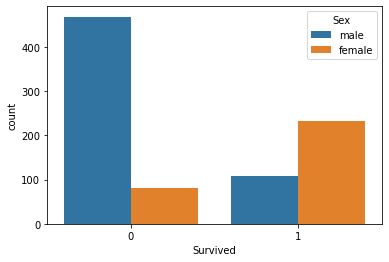

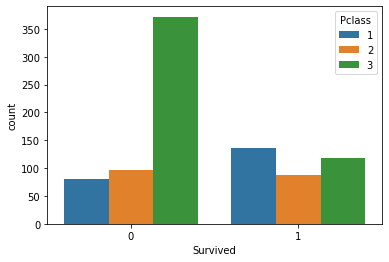

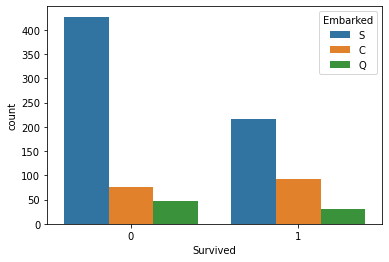

In [181]:
# 생존율.... 성별, 객실등급, 어느 항구에 탔는지...
temp_col = ["Sex", "Pclass", "Embarked"]
for colName in temp_col:
    temp_df = pd.merge(one_hot_df[colName], y, left_index=True, right_index=True)
    # 원핫과 y 합침
    sns.countplot(x="Survived", hue=colName, data=temp_df) # hue : 범례명 설정
    plt.show()
    # 생존율과 범주형 데이터 간 관계를 시각화

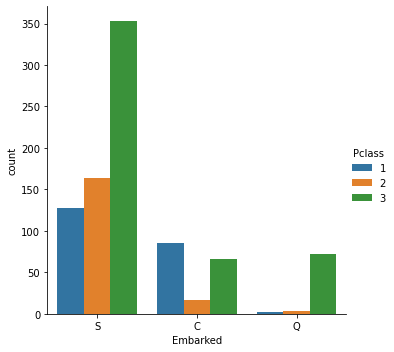

In [194]:
# 범주형 데이터들 간의 상관관계....
# one_hot_df[temp_col] - column만 출력

temp_df = pd.merge(one_hot_df[temp_col], y, left_index=True, right_index=True)
sns.catplot(x="Embarked", hue="Pclass", data=temp_df, kind="count") # catplot : 상관관계를 알아보는 함수

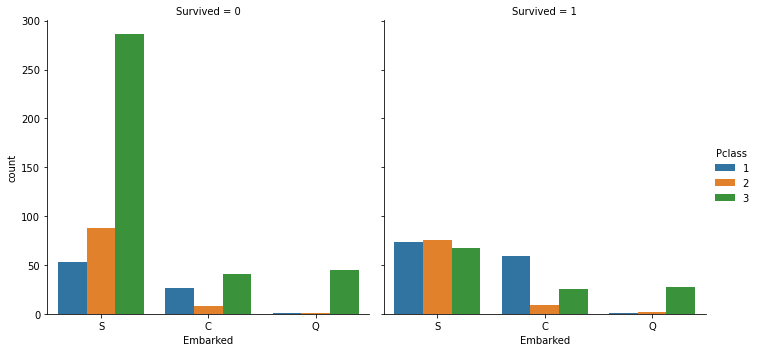

In [195]:
sns.catplot(x="Embarked", hue="Pclass", data=temp_df, kind="count", col="Survived")

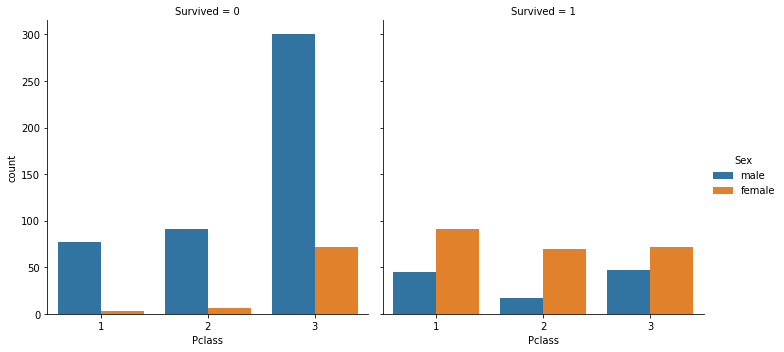

In [197]:
sns.catplot(x="Pclass", hue="Sex", data=temp_df, kind="count", col="Survived")